# ENVIRONMENT

In [1]:
import os
import acquire
import pandas as pd

# data visualization 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

from datetime import timedelta, datetime
from pylab import rcParams

# ACQUIRE

In [4]:
df = acquire.read_data('SAWS/SAWS_SSOs_2009-2018Mar_UploadData.csv')

In [5]:
df.head()

,SSO_ID,INSPKEY,SERVNO,REPORTDATE,SPILL_ADDRESS,SPILL_ST_NAME,TOTAL_GAL,GALSRET,GAL,SPILL_START,...,Root_Cause,STEPS_TO_PREVENT,SPILL_START_2,SPILL_STOP_2,HRS_2,GAL_2,SPILL_START_3,SPILL_STOP_3,HRS_3,GAL_3
0,6582,567722.0,NaN,3/10/19,3200,THOUSAND OAKS DR,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
1,6583,567723.0,NaN,3/10/19,6804,S FLORES ST,80,0.0,80.0,3/10/2019 2:25:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
2,6581,567714.0,NaN,3/9/19,215,AUDREY ALENE DR,79,0.0,10.0,3/9/2019 6:00:00 PM,...,NaN,NaN,03/10/2019 09:36,03/10/2019 10:45,1.15,69.0,NaN,NaN,0.0,0.0
3,6584,567713.0,NaN,3/9/19,3602,SE MILITARY DR,83,0.0,83.0,3/9/2019 3:37:00 PM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0
4,6580,567432.0,NaN,3/6/19,100,PANSY LN,75,0.0,75.0,3/6/2019 9:40:00 AM,...,NaN,NaN,NaN,NaN,0.00,0.0,NaN,NaN,0.0,0.0


# PREPARE

In [4]:
def missing_values_col(df):
    """
    Write or use a previously written function to return the
    total missing values and the percent missing values by column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})


def missing_values_row(df):
    """
    Write or use a previously written function to return the
    total missing values and the percent missing values by row.
    """
    null_count = df.isnull().sum(axis=1)
    null_percentage = (null_count / df.shape[1]) * 100
    return pd.DataFrame({'num_missing': null_count, 'percentage': null_percentage})


def handle_missing_threshold(df, prop_required_column = .3, prop_required_row = .9):
    """
    Removes columns and rows whose count of missing values exceeds threshold.
    """
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df


def count_val(column):
    return df[column].value_counts(dropna=False)

def remove_columns(df, columns):
    return df.drop(columns=columns)

def fill_with_zeroes(df, *cols):
    """
    Write a function that will take a dataframe and list of
    column names as input and return the dataframe with the
    null values in those columns replace by 0.
    """
    for col in cols:
        df[col] = df[col].fillna(0)
    return df


def fill_with_median(df, *cols):
    """
    Fill the NaN values with respective median values.
    """
    for col in cols:
        df[col] = df[col].fillna(df[col].median())
    return df


def fill_with_none(df, *cols):
    """
    Fill the NaN values with 'None' string value.
    """
    for col in cols:
        df[col] = df[col].fillna('None')
    return df

def fill_with_unknown(df, *cols):
    """
    Fill the NaN values with 'None' string value.
    """
    for col in cols:
        df[col] = df[col].fillna('Unknown')
    return df

_Let's take a look at missing values._

In [5]:
missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
SSO_ID,0,0.000000,0,0.000000,0,0.0
INSPKEY,797,25.039271,0,0.000000,0,0.0
SERVNO,2715,85.296890,0,0.000000,0,0.0
REPORTDATE,0,0.000000,0,0.000000,0,0.0
SPILL_ADDRESS,0,0.000000,0,0.000000,0,0.0
SPILL_ST_NAME,0,0.000000,0,0.000000,0,0.0
TOTAL_GAL,0,0.000000,0,0.000000,0,0.0
GALSRET,475,14.923029,0,0.000000,0,0.0
GAL,0,0.000000,0,0.000000,0,0.0
SPILL_START,0,0.000000,0,0.000000,0,0.0


In [6]:
df['SPILL ADDRESS'].value_counts()

SWISS OAKS 06606                                                                                                                                                            19
CHAPPIE JAMES WAY 00108                                                                                                                                                     15
HOLBROOK 00668                                                                                                                                                              10
HARRY WURZBACH 01427                                                                                                                                                         9
MOREY RD 05410                                                                                                                                                               8
CAGNON RD 06785                                                                                                              

In [7]:
missing_values_row(df).head(30)

,num_missing,percentage
0,16,28.070175
1,15,26.315789
2,13,22.807018
3,16,28.070175
4,14,24.561404
5,14,24.561404
6,12,21.052632
7,14,24.561404
8,12,21.052632
9,12,21.052632


In [8]:
# Decided to handle missing a different way, maybe
# some feature engineering or something...
# df = handle_missing_threshold(df)

In [9]:
count_val('ResponseTime')

NaN          1934
0.00          374
0.50           19
0.78           17
0.60           17
0.58           16
0.45           16
0.43           16
0.55           15
0.42           15
0.25           15
0.53           14
0.62           14
0.65           13
0.85           13
0.67           13
0.68           12
0.28           12
0.40           12
0.63           12
0.37           12
0.83           12
0.70           12
0.57           12
0.75           11
0.47           11
0.48           11
0.23           11
0.52           11
0.08           10
             ... 
8.15            1
6.73            1
-5,332.50       1
4.10            1
3.92            1
5.03            1
-14.72          1
3.62            1
-3.72           1
4.72            1
6.68            1
3.80            1
3.55            1
1.72            1
1.93            1
-8.70           1
2.22            1
1.68            1
-4.00           1
5.70            1
2.18            1
3.93            1
2.38            1
1.90            1
2.63      

In [10]:
df.columns

Index(['SSO_ID', 'INSPKEY', 'SERVNO', 'REPORTDATE', 'SPILL_ADDRESS',
       'SPILL_ST_NAME', 'TOTAL_GAL', 'GALSRET', 'GAL', 'SPILL_START',
       'SPILL_STOP', 'HRS', 'CAUSE', 'COMMENTS', 'ACTIONS', 'WATERSHED',
       'UNITID', 'UNITID2', 'DISCHARGE_TO', 'DISCHARGE_ROUTE',
       'COUNCIL_DISTRICT', 'FERGUSON', 'Month', 'Year', 'Week', 'EARZ_ZONE',
       'Expr1029', 'PIPEDIAM', 'PIPELEN', 'PIPETYPE', 'INSTYEAR', 'DWNDPTH',
       'UPSDPTH', 'Inches_No', 'RainFall_Less3', 'SPILL ADDRESS',
       'SewerAssetExp', 'NUM_SPILLS_COMPKEY', 'NUM_SPILLS_24MOS',
       'PREVSPILL_24MOS', 'UNITTYPE', 'ASSETTYPE', 'LASTCLND', 'ResponseTime',
       'ResponseDTTM', 'Public Notice', 'TIMEINT', 'Root_Cause',
       'STEPS_TO_PREVENT', 'SPILL_START_2', 'SPILL_STOP_2', 'HRS_2', 'GAL_2',
       'SPILL_START_3', 'SPILL_STOP_3', 'HRS_3', 'GAL_3'],
      dtype='object')

_Let's remove variables that do not add information._

In [11]:
df = remove_columns(df, columns=['INSPKEY',
                                 'SERVNO',
                                 'REPORTDATE',
                                 'FERGUSON',
                                 'Month',
                                 'Year',
                                 'Week',
                                 'EARZ_ZONE',
                                 'DWNDPTH',
                                 'UPSDPTH',
                                 'Inches_No',
                                 'RainFall_Less3',
                                 'SewerAssetExp',
                                 'UNITID',
                                 'UNITID2',
                                 'COUNCIL_DISTRICT',
                                 'INSTYEAR',
                                 'Public Notice',
                                 'TIMEINT',
                                 'HRS_2',
                                 'GAL_2',
                                 'HRS_3',
                                 'GAL_3',
                                 'SPILL_START_2',
                                 'SPILL_STOP_2',
                                 'SPILL_START_3',
                                 'SPILL_STOP_3',
                                 'SPILL ADDRESS',
                                 'SPILL_ADDRESS',
                                 'SPILL_ST_NAME',
                                ])

In [12]:
df.columns

Index(['SSO_ID', 'TOTAL_GAL', 'GALSRET', 'GAL', 'SPILL_START', 'SPILL_STOP',
       'HRS', 'CAUSE', 'COMMENTS', 'ACTIONS', 'WATERSHED', 'DISCHARGE_TO',
       'DISCHARGE_ROUTE', 'Expr1029', 'PIPEDIAM', 'PIPELEN', 'PIPETYPE',
       'NUM_SPILLS_COMPKEY', 'NUM_SPILLS_24MOS', 'PREVSPILL_24MOS', 'UNITTYPE',
       'ASSETTYPE', 'LASTCLND', 'ResponseTime', 'ResponseDTTM', 'Root_Cause',
       'STEPS_TO_PREVENT'],
      dtype='object')

In [13]:
df.shape

(3183, 27)

In [14]:
df = fill_with_unknown(df, 'DISCHARGE_ROUTE',
                      'ACTIONS',
                      'COMMENTS',
                      'DISCHARGE_TO',
                      'Expr1029',
                      'PIPETYPE',
                      'UNITTYPE',
                      'ASSETTYPE',
                      'Root_Cause',
                      'STEPS_TO_PREVENT',
                      )

In [15]:
df = fill_with_median(df, 'GALSRET',
                     'HRS',
                     'PIPEDIAM',
                     'PIPELEN',
                     )

In [16]:
count_val('ResponseTime')

NaN          1934
0.00          374
0.50           19
0.78           17
0.60           17
0.58           16
0.45           16
0.43           16
0.55           15
0.42           15
0.25           15
0.53           14
0.62           14
0.65           13
0.85           13
0.67           13
0.68           12
0.28           12
0.40           12
0.63           12
0.37           12
0.83           12
0.70           12
0.57           12
0.75           11
0.47           11
0.48           11
0.23           11
0.52           11
0.08           10
             ... 
8.15            1
6.73            1
-5,332.50       1
4.10            1
3.92            1
5.03            1
-14.72          1
3.62            1
-3.72           1
4.72            1
6.68            1
3.80            1
3.55            1
1.72            1
1.93            1
-8.70           1
2.22            1
1.68            1
-4.00           1
5.70            1
2.18            1
3.93            1
2.38            1
1.90            1
2.63      

In [17]:
count_val('ResponseDTTM')

NaN          1934
26-Sep-16      23
19-May-16      23
02-Jun-16      20
03-Dec-16      15
07-Aug-17      13
24-Oct-15      10
28-Mar-18      10
14-Jun-15       9
09-Sep-18       8
16-May-16       8
23-May-15       8
17-May-15       8
24-May-15       8
25-Apr-15       8
16-Sep-18       7
20-Feb-17       7
22-Sep-18       6
15-Sep-18       6
18-Apr-16       6
25-Jun-14       6
09-Jul-18       6
21-Aug-16       6
10-Sep-18       5
04-Sep-18       5
10-Mar-15       5
31-May-16       5
19-Jun-15       5
03-Jun-16       5
11-May-16       5
             ... 
20-Aug-18       1
13-Mar-17       1
17-Feb-19       1
01-Apr-14       1
10-Sep-14       1
23-Jun-18       1
03-Dec-14       1
30-Apr-16       1
24-Jan-16       1
05-Sep-15       1
25-Mar-15       1
29-Oct-14       1
05-Nov-18       1
14-Apr-14       1
05-Oct-16       1
27-Oct-14       1
03-Oct-15       1
21-May-18       1
31-Oct-14       1
01-Apr-15       1
19-Sep-18       1
19-Jan-16       1
16-Jul-18       1
31-Mar-17       1
08-Nov-15 

In [18]:
df = remove_columns(df, columns=['ResponseTime',
                                 'ResponseDTTM',
                                 ])

In [19]:
df.shape

(3183, 25)

In [20]:
missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
SSO_ID,0,0.000000,0,0.000000,0,0.0
TOTAL_GAL,0,0.000000,0,0.000000,0,0.0
GALSRET,0,0.000000,0,0.000000,0,0.0
GAL,0,0.000000,0,0.000000,0,0.0
SPILL_START,0,0.000000,0,0.000000,0,0.0
SPILL_STOP,0,0.000000,0,0.000000,0,0.0
HRS,0,0.000000,0,0.000000,0,0.0
CAUSE,0,0.000000,0,0.000000,0,0.0
COMMENTS,0,0.000000,0,0.000000,0,0.0
ACTIONS,0,0.000000,0,0.000000,0,0.0


_Let's temporarily remove the columns that needs to be feature-engineered later._

In [21]:
df0 = remove_columns(df, columns=['PIPETYPE',
                                  'NUM_SPILLS_24MOS',
                                  'PREVSPILL_24MOS',
                                  'UNITTYPE',
                                  'LASTCLND',
                                 ])

In [22]:
missing_values_col(df0)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
SSO_ID,0,0.0,0,0.0,0,0.0
TOTAL_GAL,0,0.0,0,0.0,0,0.0
GALSRET,0,0.0,0,0.0,0,0.0
GAL,0,0.0,0,0.0,0,0.0
SPILL_START,0,0.0,0,0.0,0,0.0
SPILL_STOP,0,0.0,0,0.0,0,0.0
HRS,0,0.0,0,0.0,0,0.0
CAUSE,0,0.0,0,0.0,0,0.0
COMMENTS,0,0.0,0,0.0,0,0.0
ACTIONS,0,0.0,0,0.0,0,0.0


In [23]:
df0.head()

,SSO_ID,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,DISCHARGE_TO,DISCHARGE_ROUTE,Expr1029,PIPEDIAM,PIPELEN,NUM_SPILLS_COMPKEY,ASSETTYPE,Root_Cause,STEPS_TO_PREVENT
0,6582,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,STREET,None,Unknown,8.0,16.55,1,Sewer Main,Unknown,Unknown
1,6583,80,0.0,80.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,STORMDRAIN,None,Unknown,8.0,157.00,1,Sewer Main,Unknown,Unknown
2,6581,79,0.0,10.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,ALLEY,None,Unknown,8.0,350.00,1,Sewer Main,Unknown,Unknown
3,6584,83,0.0,83.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,Unknown,SALADO CREEK,EASEMENT,None,Unknown,8.0,213.91,1,Sewer Main,Unknown,Unknown
4,6580,75,0.0,75.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,STREET,None,Unknown,12.0,291.90,2,Sewer Main,Unknown,Unknown


In [24]:
df0 = df0.rename(index=str, columns={"Expr1029": "EXPR1029", "Root_Cause": "ROOT_CAUSE"})

In [25]:
df0.head()

,SSO_ID,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,DISCHARGE_TO,DISCHARGE_ROUTE,EXPR1029,PIPEDIAM,PIPELEN,NUM_SPILLS_COMPKEY,ASSETTYPE,ROOT_CAUSE,STEPS_TO_PREVENT
0,6582,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,STREET,None,Unknown,8.0,16.55,1,Sewer Main,Unknown,Unknown
1,6583,80,0.0,80.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,STORMDRAIN,None,Unknown,8.0,157.00,1,Sewer Main,Unknown,Unknown
2,6581,79,0.0,10.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,ALLEY,None,Unknown,8.0,350.00,1,Sewer Main,Unknown,Unknown
3,6584,83,0.0,83.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,Unknown,SALADO CREEK,EASEMENT,None,Unknown,8.0,213.91,1,Sewer Main,Unknown,Unknown
4,6580,75,0.0,75.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,STREET,None,Unknown,12.0,291.90,2,Sewer Main,Unknown,Unknown


# ANALYZE

In [26]:
train = df0[:'2016']
test = df0['2016':]
print(train.nunique())
print(test.nunique())

SSO_ID                2017
TOTAL_GAL              764
GALSRET                124
GAL                    748
SPILL_START           2004
SPILL_STOP            1986
HRS                    567
CAUSE                   29
COMMENTS               194
ACTIONS                107
WATERSHED                8
DISCHARGE_TO           171
DISCHARGE_ROUTE         35
EXPR1029                19
PIPEDIAM                21
PIPELEN               1062
NUM_SPILLS_COMPKEY      18
ASSETTYPE               15
ROOT_CAUSE              19
STEPS_TO_PREVENT        10
dtype: int64
SSO_ID                1167
TOTAL_GAL              131
GALSRET                 69
GAL                    131
SPILL_START           1149
SPILL_STOP            1148
HRS                    173
CAUSE                   19
COMMENTS               151
ACTIONS                 68
WATERSHED                4
DISCHARGE_TO             9
DISCHARGE_ROUTE         26
EXPR1029                14
PIPEDIAM                15
PIPELEN                717
NUM_SPILLS_COMP

In [27]:
df0.head()

,SSO_ID,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,DISCHARGE_TO,DISCHARGE_ROUTE,EXPR1029,PIPEDIAM,PIPELEN,NUM_SPILLS_COMPKEY,ASSETTYPE,ROOT_CAUSE,STEPS_TO_PREVENT
0,6582,2100,2100.0,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,STREET,None,Unknown,8.0,16.55,1,Sewer Main,Unknown,Unknown
1,6583,80,0.0,80.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,STORMDRAIN,None,Unknown,8.0,157.00,1,Sewer Main,Unknown,Unknown
2,6581,79,0.0,10.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,ALLEY,None,Unknown,8.0,350.00,1,Sewer Main,Unknown,Unknown
3,6584,83,0.0,83.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,Unknown,SALADO CREEK,EASEMENT,None,Unknown,8.0,213.91,1,Sewer Main,Unknown,Unknown
4,6580,75,0.0,75.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,STREET,None,Unknown,12.0,291.90,2,Sewer Main,Unknown,Unknown


In [28]:
df0.SPILL_START = pd.to_datetime(df0.SPILL_START,infer_datetime_format=True)
df0.SPILL_STOP = pd.to_datetime(df0.SPILL_STOP,infer_datetime_format=True)

In [29]:
df0.head()

,SSO_ID,TOTAL_GAL,GALSRET,GAL,SPILL_START,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,DISCHARGE_TO,DISCHARGE_ROUTE,EXPR1029,PIPEDIAM,PIPELEN,NUM_SPILLS_COMPKEY,ASSETTYPE,ROOT_CAUSE,STEPS_TO_PREVENT
0,6582,2100,2100.0,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,STREET,None,Unknown,8.0,16.55,1,Sewer Main,Unknown,Unknown
1,6583,80,0.0,80.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,STORMDRAIN,None,Unknown,8.0,157.00,1,Sewer Main,Unknown,Unknown
2,6581,79,0.0,10.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,ALLEY,None,Unknown,8.0,350.00,1,Sewer Main,Unknown,Unknown
3,6584,83,0.0,83.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,Unknown,SALADO CREEK,EASEMENT,None,Unknown,8.0,213.91,1,Sewer Main,Unknown,Unknown
4,6580,75,0.0,75.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,STREET,None,Unknown,12.0,291.90,2,Sewer Main,Unknown,Unknown


In [30]:
df0 = df0.sort_values('SPILL_START')
df0 = df0.set_index('SPILL_START')
df0.head()

,SSO_ID,TOTAL_GAL,GALSRET,GAL,SPILL_STOP,HRS,CAUSE,COMMENTS,ACTIONS,WATERSHED,DISCHARGE_TO,DISCHARGE_ROUTE,EXPR1029,PIPEDIAM,PIPELEN,NUM_SPILLS_COMPKEY,ASSETTYPE,ROOT_CAUSE,STEPS_TO_PREVENT
SPILL_START,,,,,,,,,,,,,,,,,,,
2008-10-31 10:00:00,376,154000,0.0,154000.0,2009-01-14 06:00:00,1796.00,Break In Main,REPLACE SIPHON BOX,"REPLACE TWIN 54"" SIPHONS",DOS RIOS,GROUND,Unknown,STRUCTURAL,54.0,335.000000,1,Sewer Main,STRUCTURAL,Unknown
2009-01-03 09:00:00,374,500,0.0,500.0,2009-01-03 11:00:00,2.00,Rags,CLEANED MAIN,APPLIED HTH,LEON CREEK,DRAINAGE CULVERT,Unknown,DEBRIS,8.0,159.325718,3,Sewer Main,DEBRIS,Unknown
2009-01-05 08:30:00,375,25,0.0,25.0,2009-01-05 09:00:00,0.50,Debris/Rock,CLEANED MAIN,APPLIED HTH,SALADO CREEK,DRAINAGE CULVERT,Unknown,STRUCTURAL,8.0,395.260000,1,Sewer Main,STRUCTURAL,Unknown
2009-01-05 11:00:00,373,400,0.0,400.0,2009-01-05 11:45:00,0.75,Rags,CLEANED MAIN,APPLIED HTH,LEON CREEK,DRAINAGE CULVERT,Unknown,DEBRIS,8.0,380.870000,1,Sewer Main,DEBRIS,Unknown
2009-01-05 14:00:00,372,800,0.0,800.0,2009-01-05 16:00:00,2.00,Rags,CLEANED MAIN,APPLIED HTH,LEON CREEK,STREET,Unknown,STRUCTURAL,8.0,151.877494,2,Sewer Main,STRUCTURAL,Unknown


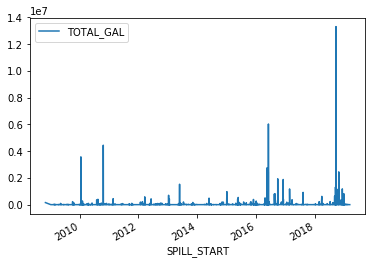

In [31]:
by_date = df0.groupby(['SPILL_START'])['TOTAL_GAL'].sum().reset_index()
by_date.plot(x='SPILL_START', y='TOTAL_GAL');

In [32]:
df0.groupby(['SPILL_START']).TOTAL_GAL.sum().head()

SPILL_START
2008-10-31 10:00:00    154000
2009-01-03 09:00:00       500
2009-01-05 08:30:00        25
2009-01-05 11:00:00       400
2009-01-05 14:00:00       800
Name: TOTAL_GAL, dtype: int64

In [33]:
df0.resample('A').mean()

,SSO_ID,TOTAL_GAL,GALSRET,GAL,HRS,PIPEDIAM,PIPELEN,NUM_SPILLS_COMPKEY
SPILL_START,,,,,,,,
2008-12-31,376.000000,154000.000000,0.000000,154000.000000,1796.000000,54.000000,335.000000,1.000000
2009-12-31,720.261780,2299.795812,111.965969,2299.795812,1.411021,9.102094,304.840859,1.963351
2010-12-31,1784.423792,20486.975836,4386.098513,20486.975836,3.887683,10.016729,310.759295,1.858736
2011-12-31,2412.601695,3316.152542,1793.841808,3316.152542,2.079473,8.675141,303.190406,1.734463
2012-12-31,2778.807487,9051.286096,373.681818,8095.803476,2.673075,10.002674,293.777690,1.901070
2013-12-31,3129.382979,16424.017730,6483.273050,15081.996454,2.488248,10.060284,273.792855,1.705674
2014-12-31,3419.357143,9291.755102,19069.821429,8606.933673,1.886461,10.591837,260.340153,1.642857
2015-12-31,3791.889734,26383.406844,3188.106464,24867.266160,4.373891,13.916350,239.002913,1.836502
2016-12-31,5935.888158,117618.253289,2077.878289,92570.720395,7.268871,12.629934,222.219803,2.250000


In [34]:
df.shape

(3183, 25)

In [35]:
df0.shape

(3183, 19)

In [36]:
df = df0.copy()

In [37]:
train = df[:'2016']
test = df['2017':]
print(train.nunique())
print(test.nunique())

SSO_ID                2694
TOTAL_GAL              537
GALSRET                123
GAL                    526
SPILL_STOP            2645
HRS                    552
CAUSE                   27
COMMENTS               326
ACTIONS                131
WATERSHED                8
DISCHARGE_TO           114
DISCHARGE_ROUTE         40
EXPR1029                18
PIPEDIAM                20
PIPELEN               1359
NUM_SPILLS_COMPKEY      18
ASSETTYPE               11
ROOT_CAUSE              18
STEPS_TO_PREVENT        10
dtype: int64
SSO_ID                489
TOTAL_GAL             375
GALSRET                43
GAL                   372
SPILL_STOP            488
HRS                   270
CAUSE                  19
COMMENTS               23
ACTIONS                42
WATERSHED               5
DISCHARGE_TO           79
DISCHARGE_ROUTE        21
EXPR1029               10
PIPEDIAM               19
PIPELEN               333
NUM_SPILLS_COMPKEY     15
ASSETTYPE              10
ROOT_CAUSE             10
STEPS_

In [38]:
missing_values_col(train)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
SSO_ID,0,0.0,0,0.0,0,0.0
TOTAL_GAL,0,0.0,0,0.0,0,0.0
GALSRET,0,0.0,0,0.0,0,0.0
GAL,0,0.0,0,0.0,0,0.0
SPILL_STOP,0,0.0,0,0.0,0,0.0
HRS,0,0.0,0,0.0,0,0.0
CAUSE,0,0.0,0,0.0,0,0.0
COMMENTS,0,0.0,0,0.0,0,0.0
ACTIONS,0,0.0,0,0.0,0,0.0
WATERSHED,0,0.0,0,0.0,0,0.0


In [39]:
missing_values_col(test)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
SSO_ID,0,0.0,0,0.0,0,0.0
TOTAL_GAL,0,0.0,0,0.0,0,0.0
GALSRET,0,0.0,0,0.0,0,0.0
GAL,0,0.0,0,0.0,0,0.0
SPILL_STOP,0,0.0,0,0.0,0,0.0
HRS,0,0.0,0,0.0,0,0.0
CAUSE,0,0.0,0,0.0,0,0.0
COMMENTS,0,0.0,0,0.0,0,0.0
ACTIONS,0,0.0,0,0.0,0,0.0
WATERSHED,0,0.0,0,0.0,0,0.0


In [40]:
overflow = train.resample('D').TOTAL_GAL.mean()

In [41]:
overflow

SPILL_START
2008-10-31    154000.00
2008-11-01          NaN
2008-11-02          NaN
2008-11-03          NaN
2008-11-04          NaN
2008-11-05          NaN
2008-11-06          NaN
2008-11-07          NaN
2008-11-08          NaN
2008-11-09          NaN
2008-11-10          NaN
2008-11-11          NaN
2008-11-12          NaN
2008-11-13          NaN
2008-11-14          NaN
2008-11-15          NaN
2008-11-16          NaN
2008-11-17          NaN
2008-11-18          NaN
2008-11-19          NaN
2008-11-20          NaN
2008-11-21          NaN
2008-11-22          NaN
2008-11-23          NaN
2008-11-24          NaN
2008-11-25          NaN
2008-11-26          NaN
2008-11-27          NaN
2008-11-28          NaN
2008-11-29          NaN
                ...    
2016-11-28          NaN
2016-11-29          NaN
2016-11-30          NaN
2016-12-01       390.00
2016-12-02          NaN
2016-12-03    262434.80
2016-12-04    100000.00
2016-12-05    109631.25
2016-12-06          NaN
2016-12-07      1812.50
2016

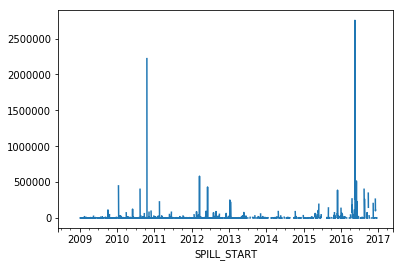

In [42]:
overflow.plot()

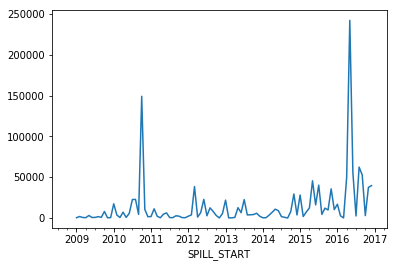

In [43]:
overflow.resample('M').mean().plot()

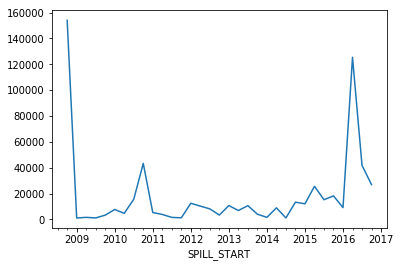

In [44]:
overflow.resample('Q').mean().plot()

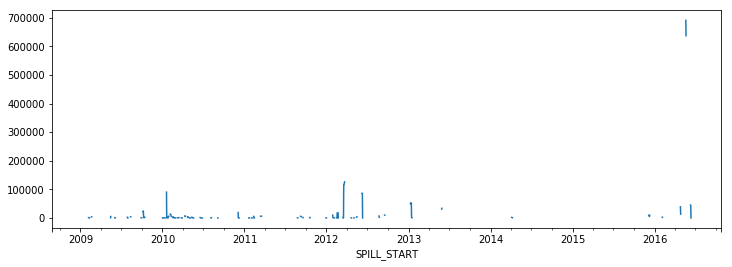

In [45]:
overflow.rolling(5).mean().plot(figsize=(12, 4))

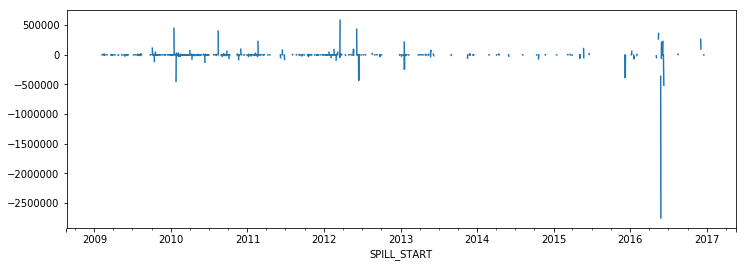

In [46]:
overflow.diff(periods=10).plot(figsize=(12, 4))

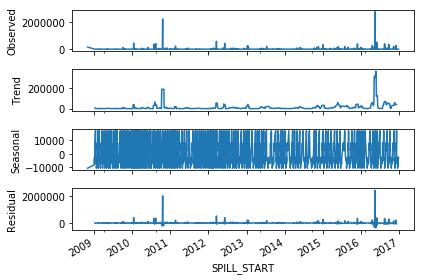

In [52]:
decomposition = sm.tsa.seasonal_decompose(overflow.dropna(), model='additive', freq=12)
fig = decomposition.plot()
plt.show()

SPILL_START
2008-10-31    154000.00
2008-11-01          NaN
2008-11-02          NaN
2008-11-03          NaN
2008-11-04          NaN
2008-11-05          NaN
2008-11-06          NaN
2008-11-07          NaN
2008-11-08          NaN
2008-11-09          NaN
2008-11-10          NaN
2008-11-11          NaN
2008-11-12          NaN
2008-11-13          NaN
2008-11-14          NaN
2008-11-15          NaN
2008-11-16          NaN
2008-11-17          NaN
2008-11-18          NaN
2008-11-19          NaN
2008-11-20          NaN
2008-11-21          NaN
2008-11-22          NaN
2008-11-23          NaN
2008-11-24          NaN
2008-11-25          NaN
2008-11-26          NaN
2008-11-27          NaN
2008-11-28          NaN
2008-11-29          NaN
                ...    
2016-11-28          NaN
2016-11-29          NaN
2016-11-30          NaN
2016-12-01       390.00
2016-12-02          NaN
2016-12-03    262434.80
2016-12-04    100000.00
2016-12-05    109631.25
2016-12-06          NaN
2016-12-07      1812.50
2016

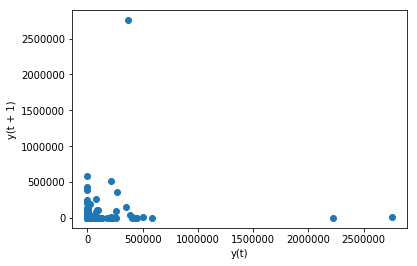

In [53]:
pd.plotting.lag_plot(overflow)

In [54]:
df_corr = pd.concat([overflow.shift(1), overflow], axis=1)
df_corr.columns = ['t-1','t+1']
result = df_corr.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.107093
t+1  0.107093  1.000000
